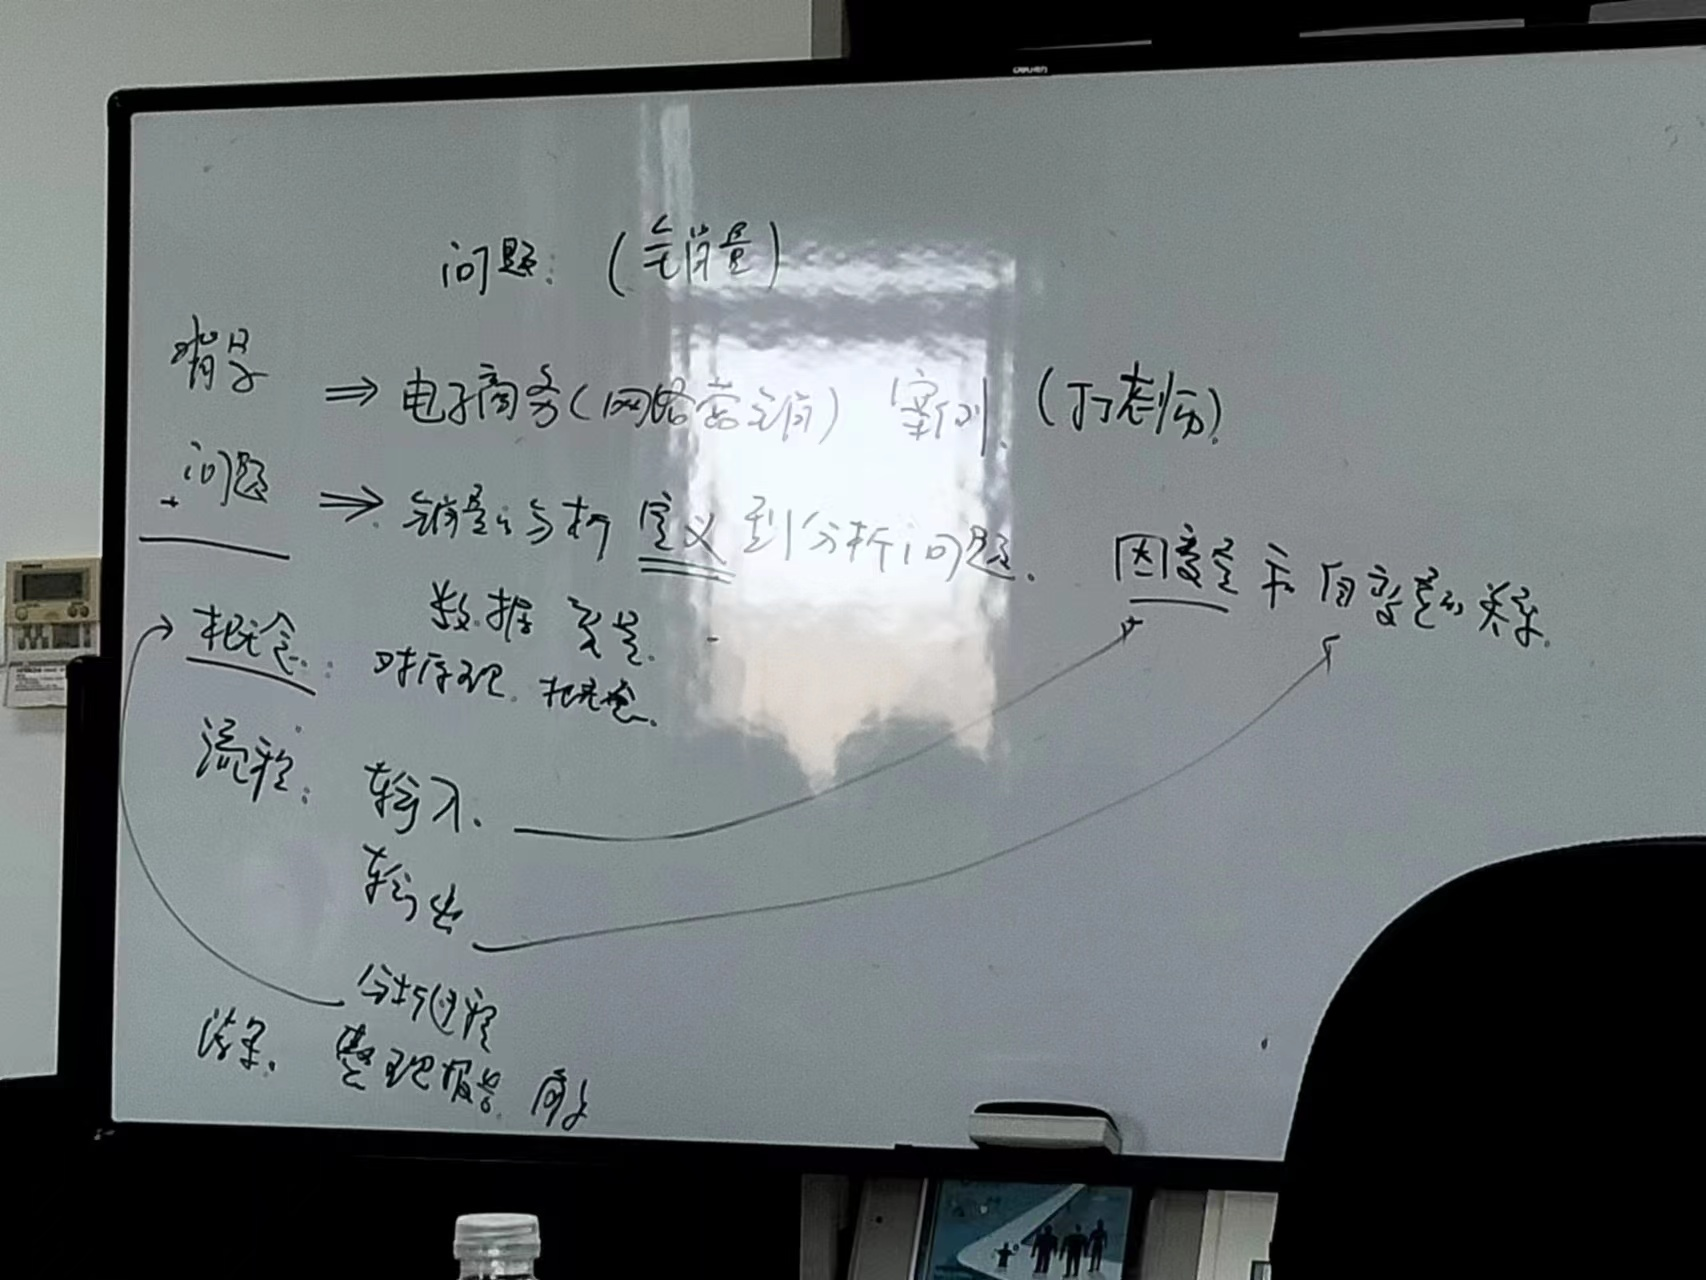

# 第七章 方差分析（渠道与销量）

参考：
（1）杨老师ppt
（2）贾俊平 《统计学》
（3）孔锐等《统计学：原理及应用》清华大学出版社
（4）[日]谷合广纪等《python统计分析基础与实践》 中国水利水电出版社

（在电子商务数据中，渠道对销量的影响是一个重要方面。）

从统计学的角度看，渠道是类别变量，销量是数值变量，因此渠道对销量的分析方法主要是本章将要介绍的方差分析。

## 7.1方差分析的基本原理

### 7.1.1 方差分析

方差分析是20世纪20年代发展起来的一种统计方法，它的基本原理是由英国统计学R.A.Fisher在进行实验设计时为解释实验数据而首先引入的。<p>
方差分析(analysis of variance,ANOVA)是分析类别变量（或自变量）对数值变量（因变量）影响的一种统计方法。<p>
自变量对因变量的影响也称为自变量效应(effect). 由于影响效应的大小表现在因变量的误差里有多少是由自变量造成的，因此方差分析是通过对数据误差的分析来检验这种效应是否显著。

**【例7-1】**<p>
为分析销售渠道对销量的影响，一家研究机构挑选了3个销售渠道：渠道1、渠道2、渠道3，然后选择受众、品质相同的10种产品，每种产品分别在3个销售渠道出售，实验获得的销量数据如下所示。<p>

|    | 渠道1 | 渠道2 | 渠道3 |
|:---:|:---:|:---:|:---:|
| 1 | 81 | 71 | 76 | 
| 2 | 82 | 72 | 79 | 
| 3 | 79 | 72 | 77 | 
| 4 | 81 | 66 | 76 | 
| 5 | 78 | 72 | 78 | 
| 6 | 89 | 77 | 89 | 
| 7 | 92 | 81 | 87 | 
| 8 | 87 | 77 | 84 | 
| 9 | 85 | 73 | 87 | 
| 10 | 86 | 79 | 87 |

在方差分析中，所要检验的对象称为因素或因子（factor），因素的不同表现成为水平（level）或处理（treatment），每个因子水平下得到的样本数据称为观测值。如例7-1中，分析销售渠道对产品销量是否有显著影响。“销售渠道”是类别变量，也称为实验的因子，渠道1、渠道2、渠道3是因子的3个不同取值，称为处理或水平，也即类别变量的各种分类，它是自变量。“销量”则是因变量，它是数值变量，每个因子水平下获得的销量是观测值。由于这里只研究销售渠道一个因素的影响，因此称为单因素3水平的实验。

### 7.1.2 误差分解

方差分析的原理就是通过对数据误差的分析来判断类别自变量（销售渠道）对数值因变量（销量）的影响效应是否显著。<p>
从例7-1的数据可以看出，产品不同渠道的数值有所不同，且三个产品的均值、方差等均有一定差异。<p>

|    |  n |mean|   sd   |median| min | max |
|:---:|:---:|:---:| :---:  | :---:|:---:|:---:|
|渠道1| 10 | 84 | 4.546061 | 83.5 |  78 |  92 |
|渠道2| 10 | 74 | 4.447221 | 72.5 |  66 | 81 |
|渠道3| 10 | 82 | 5.270463 | 81.5 |  76 | 89 |

In [1]:
import pandas as pd
from pandas import set_option
#数据读入
df = pd.read_excel("data.xlsx",sheet_name = "7-1",index_col=0)
print(df)
#描述性统计
set_option('display.width', 100)
set_option('precision', 1)
description = df.describe()
print(description.T)

    渠道1  渠道2  渠道3
1    81   71   76
2    82   72   79
3    79   72   77
4    81   66   76
5    78   72   78
6    89   77   89
7    92   81   87
8    87   77   84
9    85   73   87
10   86   79   87
     count  mean  std   min   25%   50%   75%   max
渠道1   10.0  84.0  4.5  78.0  81.0  83.5  86.8  92.0
渠道2   10.0  74.0  4.4  66.0  72.0  72.5  77.0  81.0
渠道3   10.0  82.0  5.3  76.0  77.2  81.5  87.0  89.0


总误差（total error）：反映全部观测数据的误差称为总误差。总误差可能是由不同处理造成的，也可能是由随机误差造成的。<p>
组间误差（between-group error）：由于不同处理造成的误差称为处理误差（treatment error）或称为处理效应（treatment effect），它来由于不同的处理之间，也称为组间误差。<p>
组内误差（within-group error）：由其他随机因素对观测数据造成的误差称为随机误差（random error），也简称为误差（error），由于随机误差主要存在于每种处理的内部，也称为组内误差。

平方和(Sum of squares)，数据的误差通常用平方和表示，记为SS。<p>
* 反映全部数据总误差大小的平方和称为总平方和(sum of squares for total),记为SST。
* 反映处理误差大小的平方和称为处理平方和(treatment sumof squares)或组间平方和(between-group sum of squares), 记为SSA (注：这里把因子记为A)。
* 反映随机误差大小的平方和称为误差平方和(sum of squares of error)或组内平方和(within-group sum of squares), 记为SSE.

因此,可以把总误差平方和分解为：处理误差平方和(处理平方和)与随机误差平方和(误差平方和)之和，即：<p>
$$SST = SSA + SSE$$

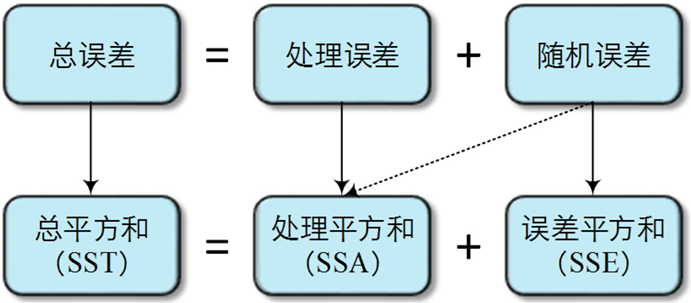

总误差的分解：
\begin{multline}
SST = \sum_{i=1}^I\sum_{j=1}^{n_i} (y_{ij}-\bar{\bar{y}})^2
 =  \sum_{i=1}^I\sum_{j=1}^{n_i} (y_{ij} - \bar{y}_i+ \bar{y}_i-\bar{\bar{y}})^2\\
 = \sum_{i=1}^I\sum_{j=1}^{n_i} (y_{ij} - \bar{y}_i)^2+ \sum_{i=1}^I\sum_{j=1}^{n_i} (\bar{y}_i-\bar{\bar{y}})^2\\
 = \sum_{i=1}^I\sum_{j=1}^{n_i} (y_{ij} - \bar{y}_i)^2+ \sum_{i=1}^In_i (\bar{y}_i-\bar{\bar{y}})^2\\
= SSE + SSA
\end{multline}

对于例7-1而言，设3个销售渠道销量的均值分别为${\mu}_1$,${\mu}_2$,${\mu}_3$，分析销售渠道对销量的影响就是做假设检验：<p>
$H_0:{\mu}_1={\mu}_2={\mu}_3$(销售渠道对销量的影响不显著)<br>
$H_1:{\mu}_1,{\mu}_2,{\mu}_3$不全相等(销售渠道对销量的影响显著)

### 7.1.3 方差分析中的基本假定【2】

方差分析中有三个基本假定：<p>
(1)每个总体都应服从正态分布。也就是说，对于因素的每一个水平， 其观测值是来自正态分布总体的简单随机样本。例如，在例7.1中，要求每个销售渠道中销量必须服从正态分布。<br>
(2)各个总体的方差2必须相同。也就是说，各组观察数据是从具有相同方差的正态总体中抽取的。例如，在例7.1中，要求各个销售渠道中销量的方差都相同。<br>
(3)观测值是独立的。例如，在例7.1中，要求每个产品销量都与其他产品销量相互独立。<p>
在上述假定成立的前提下，要分析自变量对因变量是否有影响，在形式上也就转化为检验自变量的各个水平(总体)的均值是否相等。例如，判断销售渠道对销量是否有显著影响，实际上也就是检验具有相同方差的3个正态总体的均值(被投诉次数的均值)是否相等。<p>
尽管不知道3个总体的均值，但可以使用样本数据检验它们是否相等。如果3个总体的均值相等，可以期望3个样本的均值也接近。由此，当样本均值接近时，推断总体均值相等的证据也越充分；反之，样本均值不同，推断总体均值不同的证据就越充分。换言之，样本均值变动越小，越支持$H_0$；样本均值变动越小，越支持$H_1$。若原假设$H_0:{\mu}_1={\mu}_2={\mu}_3$（3个销售渠道销量的均值相同）为真，则意味着每个样本均来自均值为$\mu$、方差为$\sigma_2$的同一个正态总体.

## 7.2 单因素方差分析

### 7.2.1 分析模型

只考虑一个因素（一个分类型自变量）对观测数据（一个数值型因变量）影响的方差分析称为单因子方差分析(one-way analysis of variance).

设因素A有$I$个处理，单因子方差分析用下面的线性模型来表示：<p>

\begin{equation}\label{key}
y_{ij}=\mu_i+\epsilon_{ij}
\end{equation}

式中，$y_{ij}$表示第$i(i=1,2,...,I)$个处理中第$j$个观察值；$\mu_i$表示第$i$个处理的平均值；$\epsilon_{ij}$表示第$i$个处理中的第$j$个观察值的随机误差。<p>
对于该模型而言，通常假定$\epsilon_{ij}\sim N(0,\sigma^2)$，这意味着无论i的数值是多少，$\epsilon_{ij}$均服从期望为0，方差为假定值的正态分布，$\epsilon_{ij}$对应的是随机误差。

设全部观测样本的总均值为$\mu$，第i个处理的均值为$\mu_i$，它与总均值之差为$\alpha_i=\mu_i-\mu$，那么第i个处理的均值可分解为：$\mu_i=\mu+\alpha_i$。那么：

$$y_{ij}=\mu_i+\epsilon_{ij}=\mu+\alpha_i+\epsilon_{ij}$$

式中，$\mu$表示不考虑因子的影响时观察值的总均值，它是模型的常数项(截距)；$\alpha_i$表示为$i(i=1,2,...,I)$时观察值的附加效应。

对应到例7-1中：销售渠道与销量的关系。<p>
用$y_{ij}$表示不同销售渠道不同产品的销量，$\mu_i$是销售渠道$i$的平均销量，$\mu$是总平均销量，$\alpha_i=\mu_{i}-\mu$表示销售渠道$i$的平均销量与总平均销量之差。那么不同销售渠道销量$y_{ij}$可以用上述模型表示，即：

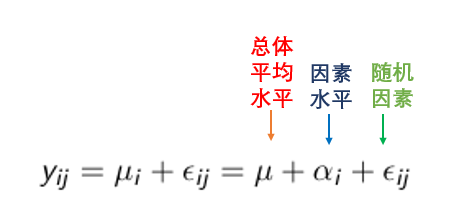

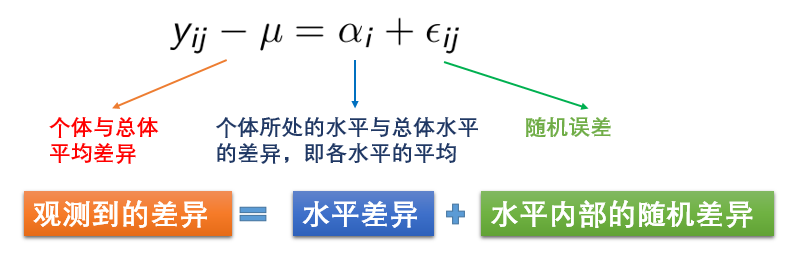

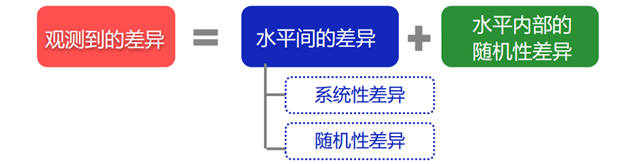

如果不同水平对结果没有影响，那么在水平的差异性中就没有系统性差异，仅有随机性差异，此时水平间的差异约等于随机性差异。<br>
反之，系统性差异应大于水平内部的随机性差异。<br>
当且仅当水平间的差异比水平内部的随机性差异大时，不同水平对结果有显著的影响。

因此，在方差分析中，我们对均值感兴趣，并借助方差判断均值之间是否存在差异。方差分析这个名字也表示：它是通过对数据误差来源的分析判断不同总体的均值是否相等。因此，进行方差分析时，需要考察数据误差的来源。

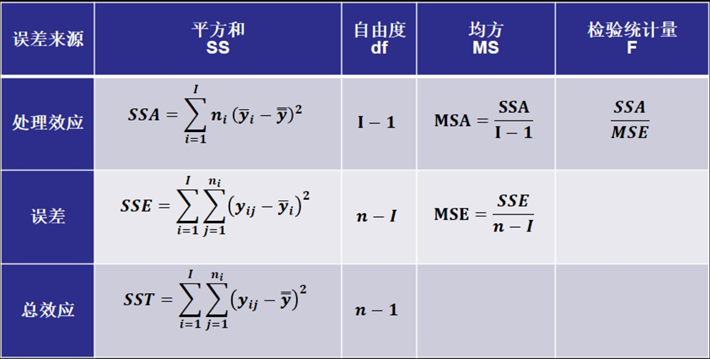

其中，n为因变量观察值的个数；$n_i$是第i个处理的样本量；$\bar{y}_i=\frac{1}{n_i}\sum_{j=1}^{n_i}{y_{ij}} (i=1,2,...,I;j=1,2,...,J)$是对应于第i个处理的样本均值；$\bar{\bar{y}} = \frac{1}{n}\sum_{i=1}^{I}\sum_{j=1}^{n_i}{y_{ij}}$是所有样本数据的总均值。
$$F=\frac{MSA}{MST}=F(n_1,n_2)$$
式中，MSA表示水平间方差，MST表示水平内方差，$n_1$表示分子的自由度，即第一自由度，$n_2$表示分母的自由度，即第二自由度。

### 7.2.2 基本步骤

单因素方差分析基本步骤如下：<p>
**第一步，提出假设**<p>
设因子A有$I$个处理，单因子方差分析要检验的假设为：<p>
$H_0:\alpha_i=0(i=1,2,...,I)$(处理效应不显著)<br>
$H_1:\alpha_i$至少有一个不等于0(处理效应显著)<p>
**第二步，计算统计量**<p>
为获得上述假设检验的统计量，需要<p>
（1）首先需要计算处理平方和SSA，误差平方和SSE.<br>
（2）然后计算自由度df，以消除观测数据多少对平方和大小的影响，其结果称为均方(mean square)。<br>
（3）最后，将处理均方(MSA)除以误差均方(MSE)，即可得到用于检验处理效应的F统计量。<p>
**第三步，查表，计算P值，并做统计决策**<p>
与假设检验相同，得到统计量后，根据P值进行决策。若$P<\alpha$，拒绝$H_0$，说明$a_i(i=1,2,...I)$不全为0，表示处理效应显著(因子对观察值有显著影响).

**【例7-2】**
沿用例7-1的数据，检验销售渠道对销量的影响是否显著。<p>
在对例7-1的方差分析中， 假定$\alpha_1=10$，代表销售渠道1的平均销量比总的平均销量高出10。如果3个销售渠道的平均销量无显著差异，则表示销售渠道对销量没有附加效应，此时有：$\alpha_1=\alpha_2=\alpha_3=0$；如果3个产品的平均销量有显著差异，那么$\alpha_1,\alpha_2,\alpha_3$至少有一个不等于0。<p>
解题过程如下：<p>
解：设销售渠道对销量的影响效应分别为$\alpha_1$(渠道1)、$\alpha_2$(渠道2)、$\alpha_3$(渠道3)。

**第一步**，提出假设<br>
$H_0:\alpha_1=\alpha_2=\alpha_3=0$(销售渠道对销量的影响不显著)<br>
$H_1:\alpha_1,\alpha_2,\alpha_3$至少有一个不等于0(销售渠道对销量的影响显著)

**第二步**，计算统计量<br>
第i个处理的样本均值：$\bar{y}_i = \frac{1}{n_i}\sum_{j=1}^{n_i}{y_{ij}}$<br>
总体的样本均值：$\bar{\bar{y}} = \frac{1}{n} \sum_{i=1}^{I}\sum_{j=1}^{n_i}{y_{ij}}$<br>
计算处理效应：$SSA =\sum_{i=1}^{I}n_i(\bar{y}_i-\bar{\bar{y}})^2$<br>
计算误差：$SSE=\sum_{i=1}^{I}\sum_{n_i}^{j=1}(y_{ij}-\bar{y}_i)^2$<br>
计算F统计量：$F=\frac{SSA/(I-1)}{SSE/(n-I)}$
 
**第三步**，查表，计算P值<br>
由于$P=0.000158<\alpha$,拒绝原假设，说明销售渠道对销量的影响显著。<p>

In [3]:
#宽表转长表，便于后续分析
df1=df.melt(value_name="销量",var_name="渠道")

#单因素方差分析
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

model = ols('销量~C(渠道)',data = df1[['渠道','销量']]).fit()
anovat = anova_lm(model)
#输出结果
print(anovat)

            df  sum_sq  mean_sq     F   PR(>F)
C(渠道)      2.0   560.0    280.0  12.3  1.6e-04
Residual  27.0   614.0     22.7   NaN      NaN


【代码说明】
statsmodels库：https://www.statsmodels.org/stable/<p>
①statsmodels.formula.api.ols(formula, data, subset=None, drop_cols=None, \*args, **kwargs)

**作用：**<br>
对输入的公式和数据，使用ols估计模型

**主要输入参数：**<br>
* formula：回归的公式，str类型或广义公式对象。
* data:用于计算数据，array_like类型，如numpy结构、pandas DataFrame格式等。
* subset:指明要在模型中使用的df子集，布尔值、整数或索引值的array-like类型。<br>

**返回：**<br>
* model:模型实例

②statsmodels.stats.anova.anova_lm(*args, **kwargs)[source]

**作用：**<br>
获得一个或多个已拟合线性模型的方差分析表

**主要输入参数：**<br>
* args:一个或多个已拟合的线性模型，已拟合的线性模型结果实例。

**返回：**<br>
* anova:DataFrame类型<br>
当参数是单独一个模型时，返回DataFrame列如下：sum_sq:模型项平方和，float64；df:模型想的自由度，float64；F:衡量加入模型项重要性的F统计量，float64；PR(>F)：衡量加入的模型项重要性的P值，float64：
当参数是多个模型时，返回结果在本章7.3.3（3）模型比较中详细介绍


### 7.2.3 关系强度【2，3】

两个变量之间的关系总是存在的，区别在于有些变量间的关系明显，有些变量间的关系不明显。只要组间平方和（组间SS）不等于零，就表明两个变量之间有关系（只是是否显著的问题）。当组间平方和比组内平方和（组内SS）大，而且大到一定程度时，就意味着两个变量之间的关系显著，大得越多，表明它们之间的关系越强。反之，当组间平方和比组内平方和小时，就意味着两个变量之间的关系不显著，小得越多，表明它们之间的关系就越弱。<p>
变量间的关系强度可以通过组件平方和（SSA）占总平方和（SST）的比例大小来反映，这一比例记为$R^2$,即：
$$R^2=\frac{SSA}{SST}$$
其平方根$R$就可以用来测量两个变量之间的关系强度。<p>
根据例7-1的数据计算的$R^2$为：<p>
$$R^2=\frac{SSA}{SST}=\frac{560}{560+614}=0.477= 47.7\%$$

这表明，销售渠道（自变量）对产品销量（因变量）的影响效应占总效应的47.7%，而残差效应则占52.3%。换言之，销售渠道对产品销量差异解释的比例达到近48%，而其他因素（残差变量）所解释的比例为52%左右。尽管$R_2$并不高，但销售渠道对销量的影响已经达到了统计上显著的程度。
$R^2$在回归分析章节称为判定系数或调整决定系数，其平方根（类似于系数r）可以用来测量自变量与因变量之间的关系强度。例如，根据上面的结果可以计算出$R=0.69$,这表明销售渠道和销量之间有中等以上的关系。

### 7.2.4 方差分析中的多重比较【1】

方差分析的结果显示，销售渠道对销量有显著影响，或者说不同销售渠道之间的销量差异显著，但这一检验结果并未告诉我们究竟哪种销售渠道之间的销量差异显著。<p>
为了分析这种差异到底出现在哪种销售渠道之间，设渠道1的均值为$\mu_1$，渠道2的均值为$\mu_2$，渠道3的均值为$\mu_3$，也就是要找出$\mu_1$与$\mu_2$, $\mu_1$与$\mu_3$、$\mu_2$与$\mu_3$之间究竟哪两个均值不相等，这种对均值的配对检验就是方差分析中的多重比较(multiple comparison)。


**（1）Fisher的LSD方法**<p>
最小显著差异(least significant difference, LSD)法由统计学家Fisher提出，因此也称为Fisher的最小显著差异法，简称LSD方法。<p>
该方法适应性场景：如果研究者在实现就已经计划好要对某对或某几对均值进行比较，不管方差分析的结果如何，都要进行比较，这时适合采用LSD方法。<p>
LSD方法检验步骤如下：

**第一步：提出假设**<br>
$$H_0: \mu_i=\mu_j; H_1: \mu_i\neq\mu_j$$

**第二步：计算检验统计量**<br>
$$t_{ij}=\frac{\bar{y}_i-\bar{y}_j}{\sqrt{MSE(\frac{1}{n_i}+\frac{1}{n_j})}}$$
式中，$\bar{y}_i$和$\bar{y}_j$分别是第i个样本和第j个样本的均值；$\bar{n}_i$和$\bar{n}_j$分别是第i个样本和第j个样本的样本量；MSE是方差分析得到的误差均方。如果$H_0$成立，该统计量服从自由度为(n-I)的t分布。

**第三步：做出决策。**<br>
计算出统计量的P值，若$P<\alpha$，拒绝$H_0$。

LSD方法不仅可以检验$\mu_1-\mu_2=0$的原假设，也可以计算$\mu_1-\mu_2$的置信区间，给定显著水平$\alpha$，$\mu_1-\mu_2$在$1-\alpha$置信水平下的置信区间为$(\bar{y}_i-\bar{y}_j) \pm LSD$，即：

$$(\bar{y}_i-\bar{y}_j) \pm t_{\alpha/2}(n-I)\sqrt{MSE(\frac{1}{n_i}+\frac{1}{n_j})}$$

而对于第i个处理，其总体均值$\mu_i$在$1-\alpha$置信水平下的置信区间为：<p>

$$\bar{y}_i \pm t_{\alpha/2}(n-I)\sqrt{\frac{MSE}{n_i}}$$


**【例7-3】**<p>
沿用例7-2中的数据，假定在实验之前就已经计划好对渠道1和渠道3进行比较，用LSD方法比较这两个渠道的销量之间是否有显著差异($\alpha= 0.05$)，并计算渠道1和渠道2销量差值的95%的置信区间。

**步骤1**：提出原假设：<br>
$H_0:\mu_1=\mu_3$; $H_1:\mu_1\neq \mu_3$

**步骤2**：计算检验统计量t，根据式(4)有：<br>
$t_{13}=\frac{84-82}{\sqrt{22.74074\times(\frac{1}{10}+\frac{1}{10})}}=0.93780434$

**步骤3**：做出决策。计算出统计量的P值
$$P(t>0.93780434)=1-P(t\leq0.93780434)=0.17832914$$
由于是双侧检验，需要将上述P值乘以2，即: 
$$P = 2\times 0.17832914 = 0.35665828$$
由于P= 0.35665828>0.05，不能拒绝$H_0$，渠道1和渠道2的均值之间差异不显著；<br>
进一步求解渠道1和渠道3销量均值差值的95\%的置信区间为：<br>
$(84-82)\pm 2.051831 \times \sqrt{22.74074 \times (\frac{1}{10}+\frac{1}{10})}$
$=2\pm 4.375813$<br>
即：(-2.3758,6.3758)之间。<br>
可见，置信区间包含了0，假设检验结果与置信区间计算结果基本一致。

**（2）Tukey-Kramer的HSD方法**<p>
真实显著差异(honestly significant difference, HSD)法由统计学家Jone W.Tukey于1953年提出的，因此也称为Tukey的HSD方法。<p>
适用性条件：由于Tukey的HSD方法要求各处理的样本量相同，因此当各处理的样本量不相同时，该方法就不再适用。<p>
HSD方法的依据不是t分布，而是学生化全距分布(studentized range distribution)，该分布有两个参数，他们分别是I和(N-1). HSD方法的自由度为I和(N-1)。 HSD方法用自由度I和(N-1)的学生化全距分布的$(1-\alpha)$分位数作为临界值，记为$q_\alpha(I,N-1)$。<p>
HSD考虑三个参数:处理个数、均方误差(MSE)和样本量，HSD的计算公式如下：

$$HSD=q_{\alpha} (I,N-1)  \sqrt{  \frac{MSE}{2} (\frac{1}{n_i}+\frac{1}{n_j})  }$$

HSD方法也可以得到$\mu_i-\mu_j$的置信区间，设显著性水平$\alpha$,$\mu_i-\mu_j$在$1-\alpha$的置信区间为$(\bar{y}_i-\bar{y}_j) \pm HSD$，即

$$(\bar{y}_i-\bar{y}_j)\pm q_\alpha(I,N-1) \sqrt{  \frac{MSE}{2} (\frac{1}{n_i}+\frac{1}{n_j}) }$$

**【例7-4】**
沿用例7-2的数据，假定在实验之前并未计划要对任何销售渠道之间的差异进行比较，若方差分析结果拒绝原假设，用HSD方法对不同销售渠道的销量均值做多重比较($\alpha$= 0.05)<p>
解：**第一步**：提出假设
$$H_0:\mu_i=\mu_j; H_1: \mu_i \neq \mu_j$$
    
**第二步**：计算HSD，由【R函数qtukey(0.95,3,27)】得到临界值为3.506426，计算的HSD为：
$$HSD=3.506426\times \sqrt{\frac{22.74074}{2} \times (\frac{1}{10}+\frac{1}{10})} = 5.287702$$
**第三步**：计算各处理的样本均值差的绝对值|$\bar{y}_i-\bar{y}_j$|，并与HSD进行比较做出决策，若|$\bar{y}_i-\bar{y}_j$|>HSD,拒绝$H_0$<br>
|$\bar{y}_1-\bar{y}_2$|=|84-74|=10> 5.287702，拒绝$H_0$，渠道1和渠道2的销量之间存在显著的差异<br>
|$\bar{y}_1-\bar{y}_3$|=|84-82|=2 < 5.287702，不拒绝$H_0$，渠道1和渠道3的销量之间差异不显著<br>

## 7.3 双因素方差分析

### 7.3.1 双因素方差分析简介

考虑两个类别自变量对数值变量影响的方差分析称为双因子方差分析(two-way analysis of variance).<p>
分析时有两种情形：<p>
* 只考虑两个因子对因变量的单独影响，即主效应(main effect)，这时的方差分析称为只考虑主效应的双因子方差分析，或为无重复双因子分析(two-factor without replication)
* 除了两个因子的主效应外，还考虑两个因子的搭配对因变量产生的交互效应(interaction effect)，这时的方差分析称为考虑交互效应的双因子方差分析，或称为可重复双因子分析(two-factor with relication)

**（1）数学模型**<p>
设因子A有$I$个处理，因子B有$J$个处理，两个因子共有$IJ$种不同的处理组合

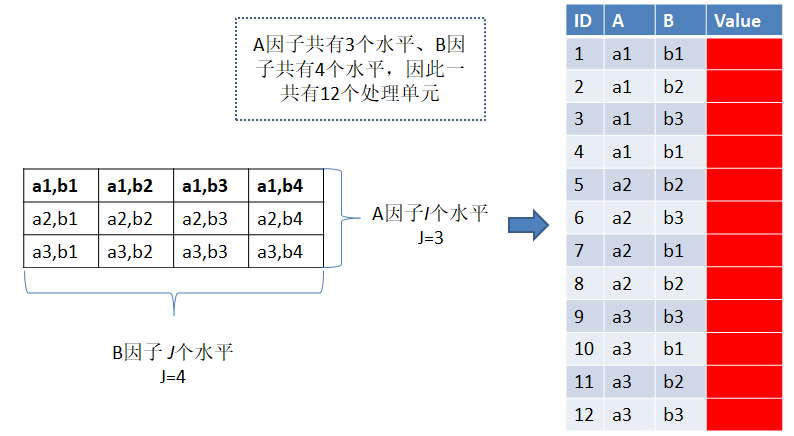

在给出方差分析模型之前，给出下面定义：
* $\bar{\mu}_{i.}$：因子A的第i个处理的均值(i=1,2,...,I)
* $\bar{\mu}_{.j}$：因子B的第j个处理的均值(j=1,2,...,J)
* $\mu$：总均值，它是所有处理均值$\mu_{ij}$的平均
* $\alpha_i$：因子A的效应，衡量因子A第i个处理均值与总均值的差异程度，即$\alpha_i=\bar{\mu}_{i.}-\mu$
* $\beta_j$：因子B的效应，衡量因子B第j个处理均值与总均值的差异程度，即$\beta_j=\bar{\mu}_{.j}-\mu$
* $\gamma_{ij}$：因子A的第i个处理和因子B的第j个处理搭配产生的交互效应，衡量因子A的第i个处理和因子B的第j个处理搭配(共IJ个)对因变量产生的效应
* $\epsilon_{ijk}$：误差，随机因子对因变量的影响

对于任何一个观测值$y_{ijk}$，都可以表达为线性组合：
$$y_{ijk}=\mu+\alpha_i+\beta_j+\gamma_{ij}+\epsilon_{ijk},k=1,2,...,K$$
式中：
* $y_{ijk}$：表示因子A的第i个处理和因子B的第j个处理组合的第k个观察值
* $\mu$：表示不考虑因子A和因子B及交互效应观察值的总均值，它是模型的常数项(截距)
* $\alpha_i$：表示因子A的处理为i时的观测数据附加效应，对应的就是因子A的处理误差
* $\beta_j$：表示因子B的处理为j时的观测数据附加效应，对应的就是因子B的处理误差
* $\gamma_{ij}$：因子A的第i个处理和因子B的第j个处理搭配产生的交互效应
* $\epsilon_{ijk}$：误差，随机因子对因变量的影响

当交互效应$\gamma_{ij}$为0时，上式变为没有交互效应的双因子方差分析模型，形式可以简化为：

$$y_{ijk}=\mu+\alpha_i+\beta_j+\epsilon_{ijk},k=1,2,...,K$$

它是双因子方差分析的一个特例。

### 7.3.2 无交互作用的双因素方差分析

无交互作用的双因素方差分析模型：

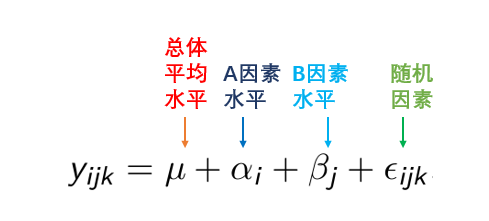

**（1）效应检验**<p>
对于因子A的$I$个处理和因子B的$J$个处理，要检验因子A和因子B对因变量的主效应，也就是检验如下假设：<p>
检验因子A的假设<br>
	$H_0: \alpha_i=0(i=1,2,...,I)$(因子A的处理效应不显著)<br>
	$H_1: \alpha_i$至少有一个不等于0(因子A的处理效应显著)<p>
检验因子B的假设<br>
	$H_0: \beta_j=0(j=1,2,...,J)$(因子B的处理效应不显著)<br>
	$H_1: \beta_j$至少有一个不等于0(因子B的处理效应显著)


各因子的效应用误差来表示，检验上述假设时，与单因素方差分析相同，交叉项为0，因此:
$$SST =  SSE + SSA + SSB$$
其中，SSA是由因素A引起的变异，SSB是由因素B引起的变异，而SSE是随机因素引起的变异

与模型对应的误差分解过程如图所示：

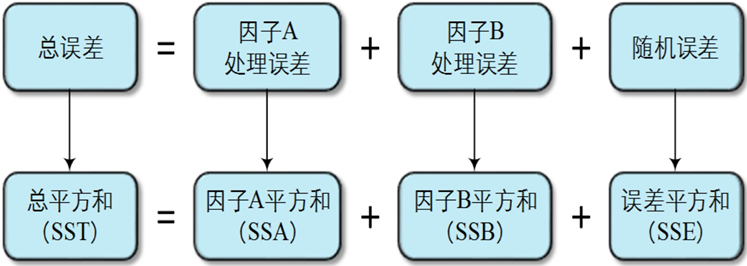

如图所示，可以构建检验因子A和因子B主效应的统计量$F_A$和$F_B$

假设$y_{ijk}$表示因子A的第i个处理和因子B的第j个处理组合的第k个观察值，$\bar{y}_{i.}$为因子A的第i个处理的样本均值；$\bar{y}_{.j}$为因子B的第j个处理的样本均值；，$\bar{y}_{ij}$为因子A的第i个处理和因子B第j个处理组合的样本均值；$\bar{\bar{y}}$为全部IJK个观察值的总均值；下面计算各平方和

* 总平方和：$SST=\sum_{i=1}^{I}\sum_{j=1}^{J}\sum_{k=1}^{K}(y_{ijk}-\bar{\bar{y}})^2$
* 因子A的平方和：$SSA=JK\sum_{i=1}^{I}(\bar{y}_{i.}-\bar{\bar{y}})^2$
* 因子B的平方和：$SSB=IK\sum_{j=1}^{J}(\bar{y}_{.j}-\bar{\bar{y}})^2$
* 误差平方和：$SSE=SST-SSA-SSB$

将各平方和(SS)除以相应的自由度df，得到各均方(MS)，再将各处理均方(MSA和MSB)分别除以误差均方(MSE)，即得到用于检验因子A和因子B主效应的统计量$F_A$和$F_B$.

令：<p>
$\bar{\bar{y}} = \frac{1}{IJK} \sum_{i=1}^I\sum_{j=1}^J\sum_{k=1}^K y_{ijk}$<p>

$\bar{y}_{ij}=\frac{1}{K}\sum_{k=1}^K y_{ijk}$, $i=1,2,...,I$,$J=1,2,...,J$<p>

$\bar{y}_{i\cdot} = \frac{1}{J}\sum_{j=1}^J \bar{y}_{ij}$, $i=1,2,...,I$，则有$\bar{\bar y} = \frac{1}{I}\sum_{i=1}^I\bar{y}_{i\cdot}$<p>

$\bar{y}_{\cdot j} = \frac{1}{I}\sum_{i=1}^I \bar{y}_{ij}$, $j=1,2,...,J$，则有$\bar{\bar y} = \frac{1}{J}\sum_{j=1}^J\bar{y}_{\cdot j}$<p>

$SST = \sum_{i=1}^I\sum_{j=1}^J\sum_{k=1}^K (y_{ijk}-\bar{\bar{y}})^2\\
    = \sum_{i=1}^I\sum_{j=1}^J\sum_{k=1}^K [(y_{ijk}-\bar{y}_{i\cdot}-\bar{y}_{\cdot j}+\bar{\bar{y}}) + (\bar{y}_{i\cdot}-\bar{\bar{y}})  +(\bar{y}_{\cdot j}-\bar{\bar{y} })) ]^2\\
    = \sum_{i=1}^I\sum_{j=1}^J\sum_{k=1}^K(y_{ijk}-\bar{y}_{i\cdot}-\bar{y}_{\cdot j}+\bar{\bar{y}})^2 + \sum_{i=1}^I\sum_{j=1}^J\sum_{k=1}^K (\bar{y}_{i\cdot}-\bar{\bar{y}})^2 
    +\sum_{i=1}^I\sum_{j=1}^J\sum_{k=1}^K (\bar{y}_{\cdot j}-\bar{\bar{y} }))^2\\
    = \sum_{i=1}^I\sum_{j=1}^J\sum_{k=1}^K(y_{ijk}-\bar{y}_{i\cdot}-\bar{y}_{\cdot j}+\bar{\bar{y}})^2 + JK\sum_{i=1}^{I}(\bar{y}_{i.}-\bar{\bar{y}})^2 + IK\sum_{j=1}^{J}(\bar{y}_{.j}-\bar{\bar{y}})^2 \\
    = SSE + SSA + SSB$

只考虑主效应的双因子方差分析表如下：

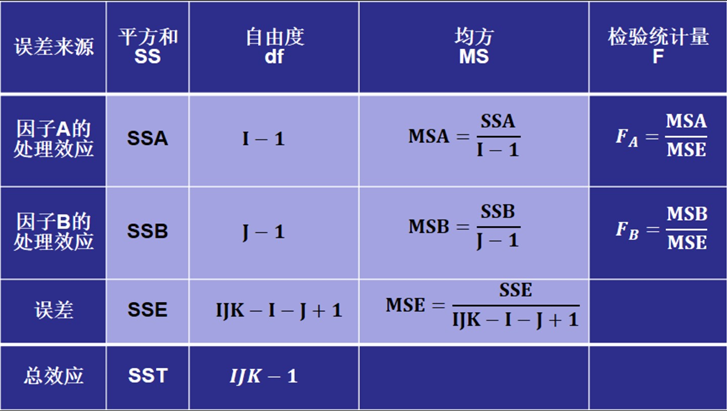

注：如果两个因子的每种处理组合只测得一个观察值，即k=1，则误差平方和的自由度为(I-1)(J-1)

**【例7-5】**
假定例7-2中，除了要考虑销售渠道对销量的影响，还要考虑广告投放对销量的影响。设甲、乙两种广告投放方式，这样三种销售渠道和两种广告投放方式搭配6种组合。如果进行30次试验，每一种搭配可以做5次试验，也就是每个渠道-广告投放样本量为5，即相当于每个渠道-广告投放重复做5次试验，试验取得的数据如下表所示。检验销售渠道和广告投放方式对产品销量的影响是否显著($\alpha$ = 0.05)

|    | 销售渠道 | 广告投放 | 销量 |
|:---:|  :---:  |  :---:  | :---: |
| 1  |  渠道1  |   甲    |  81  | 
| 2  |  渠道1  |   甲    |  82  | 
| 3  |  渠道1  |   甲    |  79  | 
| 4  |  渠道1  |   甲    |  81  | 
| 5  |  渠道1  |   甲    |  78  | 
| 6  |  渠道1  |   乙    |  89  | 
| 7  |  渠道1  |   乙    |  92  | 
| 8  |  渠道1  |   乙    |  87  | 
| 9  |  渠道1  |   乙    |  85  | 
| 10 |  渠道1  |   乙    |  86  | 
| 11 |  渠道2  |   甲    |  71  | 
| 12 |  渠道2  |   甲    |  72  | 
| 13 |  渠道2  |   甲    |  72  | 
| 14 |  渠道2  |   甲    |  66  | 
| 15 |  渠道2  |   甲    |  72  |
| 16 |  渠道2  |   乙    |  77  | 
| 17 |  渠道2  |   乙    |  81  | 
| 18 |  渠道2  |   乙    |  77  | 
| 19 |  渠道2  |   乙    |  73  | 
| 20 |  渠道2  |   乙    |  79  | 
| 21 |  渠道3  |   甲    |  76  | 
| 22 |  渠道3  |   甲    |  79  | 
| 23 |  渠道3  |   甲    |  77  | 
| 24 |  渠道3  |   甲    |  76  | 
| 25 |  渠道3  |   甲    |  78  | 
| 26 |  渠道3  |   乙    |  89  | 
| 27 |  渠道3  |   乙    |  87  | 
| 28 |  渠道3  |   乙    |  84  | 
| 29 |  渠道3  |   乙    |  87  | 
| 30 |  渠道3  |   乙    |  87  |

解题过程：<p>
**第一步：**写出假设<br>
设销售渠道(因子A)对销量的附加效应分别为$\alpha_1$(渠道1)、$\alpha_2$(渠道2)和$\alpha_3$(渠道3);广告投放方式(因子B)对销量的附加效应分别为$\beta_1$(广告投放方式甲)和$\beta_2$(广告投放方式乙)<br>
检验销售渠道效应的假设为：<br>
$H_0:\alpha_1=\alpha_2=\alpha_3=0$(销售渠道对销量的影响不显著)<br>
$H_1:\alpha_1,\alpha_2,\alpha_3$至少有一个不等于0(销售渠道对销量的影响显著)<br>
检验广告投放方式效应的假设为：<br>
$H_0:\beta_1=\beta_2=0$(广告投放方式对销量的影响不显著)<br>
$H_1:\beta_1,\beta_2$至少有一个不等于0(广告投放方式对销量的影响显著)<p>
**第二步：**通过箱线图描述产品和广告投放方式对销量的影响

   销售渠道 广告投放  销量
1   渠道1    甲  81
2   渠道1    甲  82
3   渠道1    甲  79
4   渠道1    甲  81
5   渠道1    甲  78
6   渠道1    乙  89
7   渠道1    乙  92
8   渠道1    乙  87
9   渠道1    乙  85
10  渠道1    乙  86
11  渠道2    甲  71
12  渠道2    甲  72
13  渠道2    甲  72
14  渠道2    甲  66
15  渠道2    甲  72
16  渠道2    乙  77
17  渠道2    乙  81
18  渠道2    乙  77
19  渠道2    乙  73
20  渠道2    乙  79
21  渠道3    甲  76
22  渠道3    甲  79
23  渠道3    甲  77
24  渠道3    甲  76
25  渠道3    甲  78
26  渠道3    乙  89
27  渠道3    乙  87
28  渠道3    乙  84
29  渠道3    乙  87
30  渠道3    乙  87


<AxesSubplot:xlabel='class_name', ylabel='销量'>

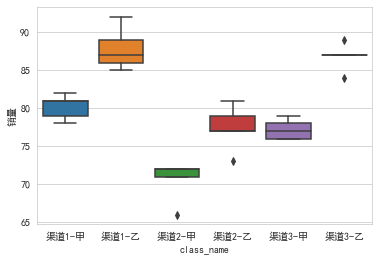

In [1]:
import pandas as pd
from pandas import set_option
import numpy as np
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

#数据读入
df = pd.read_excel("data.xlsx",sheet_name = "7-5",index_col=0)
print(df)

# 箱线图绘制
import seaborn as sns

#避免中文乱码问题
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

df['class_name'] = df['销售渠道']+'-'+df['广告投放']
sns.boxplot(x='class_name',y='销量',data=df)

通过描述统计来描述产品和广告投放方式对销量的影响：<br>

In [2]:
#按照【销售渠道】分组，进行描述性统计
print(df[['销售渠道','销量']].groupby(['销售渠道']).describe())
#按照【广告投放方式】分组，进行描述性统计
print(df[['广告投放','销量']].groupby(['广告投放']).describe())

        销量                                                
     count  mean       std   min    25%   50%    75%   max
销售渠道                                                      
渠道1   10.0  84.0  4.546061  78.0  81.00  83.5  86.75  92.0
渠道2   10.0  74.0  4.447221  66.0  72.00  72.5  77.00  81.0
渠道3   10.0  82.0  5.270463  76.0  77.25  81.5  87.00  89.0
        销量                                              
     count  mean       std   min   25%   50%   75%   max
广告投放                                                    
乙     15.0  84.0  5.398412  73.0  80.0  86.0  87.0  92.0
甲     15.0  76.0  4.519798  66.0  72.0  77.0  79.0  82.0


**第三步：**调用【python-aov】获取主效应方差分析表。

In [3]:
model1 = ols('销量~C(销售渠道)+C(广告投放)',data=df).fit()
anovat = anova_lm(model1)
print(anovat)

            df  sum_sq     mean_sq          F        PR(>F)
C(销售渠道)    2.0   560.0  280.000000  54.328358  5.184290e-10
C(广告投放)    1.0   480.0  480.000000  93.134328  4.422633e-10
Residual  26.0   134.0    5.153846        NaN           NaN


**第四步：**结果分析<br>

In [4]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     销量   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     67.26
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           2.21e-12
Time:                        20:49:21   Log-Likelihood:                -65.018
No. Observations:                  30   AIC:                             138.0
Df Residuals:                      26   BIC:                             143.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         88.0000      0.829    106.157      0.000      86.296      89.704
C(销售渠道)[T.渠道2]   -10.0000      1.015     -9.850      0.000     -12.087      -7.913
C(销售渠道)[T.渠道3]    -2.0000      1.015     -1.970      0.060      -4.087       0.087
C(广告投放)[T.甲]      -8.0000      0.829     -9.651      0.000      -9.704      -6.296
==============================================================================
Omnibus:                        0.889   Durbin-Watson:                   2.269
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.880
Skew:                          -0.360   Prob(JB):                        0.644
Kurtosis:                       2.570   Cond. No.                         4.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color='green'>【参考 4 p219】</font><br>
【代码说明】<br>
①model.summary()<br>
通过调用summary()方法，可以输出回归分析的模型结果，主要包括三部分：
* 模型概要和模型与数据的拟合度
* 回归模型的估计结果
* 模型中误差项服从正态分布的假设的有效性

①根据方差分析表推断各因子对因变量的影响。<br>
从方差分析结果可以看出，检验销售渠道和广告投放方式两个因子的P值均接近于0，表示两个因子对销量均有明显的影响。<p>
②根据参数估计分析因素的影响附加效应.<br>
根据方差分析结果第二部分结果，结合方差分析的数学模型$y_{ijk}=\mu+\alpha_i+\beta_j+\epsilon_{ijk}$可知，常数项$\mu$表示不考虑销售渠道和广告投放方式影响时销量的均值为88kg。 渠道2参照渠道1的附加效应$\alpha_2=-10$,渠道3参照渠道1的附加效应$\alpha_3=-2$,广告投放方式甲参照广告投放方式乙的附加效应$\beta_2=-8$

**（2）效应量分析**<p>
在两个因子的主效应方差分析中，衡量效应量大小的统计量是偏效应(partial effect)，即偏$\eta^2$。

因子A和因子B的偏效应量分别为:
$$partial \ \eta^2 \ of \ A= \frac{SSA}{SSA+SSE}$$

$$partial \ \eta^2 \ of \ B= \frac{SSB}{SSB+SSE}$$

**【例7-5续】**

**第六步：**计算销售渠道和广告投放方式的偏效应量，分别为：
$$partial \ \eta^2 \ of \ A= \frac{SSA}{SSA+SSE}=\frac{560}{560+134}=0.8069$$
$$partial \ \eta^2 \ of \ B= \frac{SSB}{SSB+SSE}=\frac{480}{480+134}=0.7818$$

此外还可以计算主效应量，它反映每个因子对因变量的单独影响大小，计算方法是分别将每个因子的平方和除以总平方和：<p>
**第六步续：**计算销售渠道和广告投放方式的主效应量，分别为：
$$\eta^2 \ of \ A= \frac{SSA}{SSA+SSB+SSE}=\frac{560}{560+480+134}=0.4770$$
$$\eta^2 \ of \ B= \frac{SSB}{SSB+SSB+SSE}=\frac{480}{560+480+134}=0.4089$$

注意：<p>
有两个实验因子时，考虑交互效应的方差分析与分别对两个因子做单因子方差分析是不同的，对两个因子分别做单因子方差分析实际上是假定两个因子间不存在交互效应，当两个因子之间存在交互效应时可能会得到错误的结论。<br>
因此，当两个因子之间存在交互效应时，应先考虑交互效应的方差分析；当交互效应不显著时，再考虑使用主效应方差分析模型，或者分别对两个因素进行单因素的方差分析。

### 7.3.3 有交互作用的双因素方差分析

如果除了考虑销售渠道和广告投放方式两个因子的主效应外，还考虑两个因子搭配对销量的交互效应，即交互效应$\gamma_{ij}$不为0，此时方差分析的模型为下式：
$$y_{ijk}=\mu+\alpha_i+\beta_j+\gamma_{ij}+\epsilon_{ijk},k=1,2,...,K$$
    
交互效应方差分析模型如下：
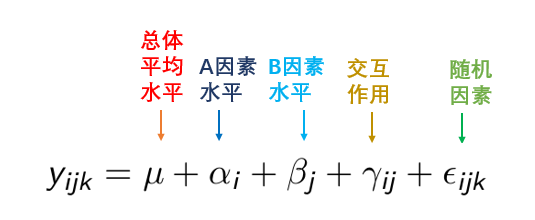

**（1）效应检验**<p>

要检验因子A和因子B对因变量的主效应及交互效用，也就是检验如下假设：<p>
**检验因子A的假设**<p>
$H_0: \alpha_i=0(i=1,2,...,I)$(因子A的处理效应不显著)	
$H_1: \alpha_i$至少有一个不等于0(因子A的处理效应显著)<p>
**检验因子B的假设**<p>
$H_0: \beta_j=0(j=1,2,...,J)$(因子B的处理效应不显著)	
$H_1: \beta_j$至少有一个不等于0(因子B的处理效应显著)<p>
**检验交互效应的假设**<p>
$H_0: \gamma_{ij}=0$(交互效应不显著)
$H_1: \gamma_{ij}$(交互效应显著)<p>

总误差分解如下图所示：
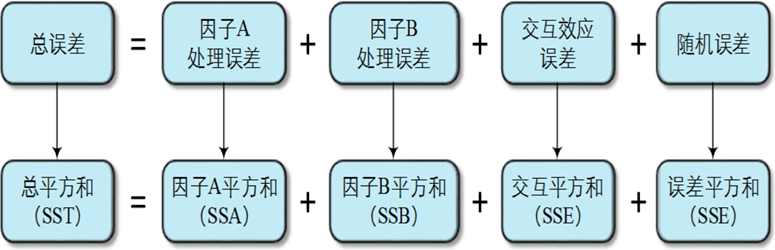

令：<p>
$\bar{\bar{y}} = \frac{1}{IJK} \sum_{i=1}^I\sum_{j=1}^J\sum_{k=1}^K y_{ijk}$

$\bar{y}_{ij}=\frac{1}{K}\sum_{k=1}^K y_{ijk}$, $i=1,2,...,I$,$J=1,2,...,J$

$\bar{y}_{i\cdot} = \frac{1}{J}\sum_{j=1}^J \bar{y}_{ij}$, $i=1,2,...,I$，则有$\bar{\bar y} = \frac{1}{I}\sum_{i=1}^I\bar{y}_{i\cdot}$

$\bar{y}_{\cdot j} = \frac{1}{I}\sum_{i=1}^I \bar{y}_{ij}$, $j=1,2,...,J$，则有$\bar{\bar y} = \frac{1}{J}\sum_{j=1}^J\bar{y}_{\cdot j}$

$SST = \sum_{i=1}^I\sum_{j=1}^J\sum_{k=1}^K (y_{ijk}-\bar{\bar{y}})^2\\
= \sum_{i=1}^I\sum_{j=1}^J\sum_{k=1}^K [
  (y_{ijk}-\bar{y}_{ij})
+(\bar{y}_{ij}-\bar{y}_{i\cdot}-\bar{y}_{\cdot j}+\bar{\bar{y}}) 
+ (\bar{y}_{i\cdot}-\bar{\bar{y}})  
+(\bar{y}_{\cdot j}-\bar{\bar{y} })) ]^2\\
= \sum_{i=1}^I\sum_{j=1}^J\sum_{k=1}^K (y_{ijk}-\bar{y}_{ij})^2 
+ K\sum_{i=1}^I\sum_{j=1}^J(\bar{y}_{ij}-\bar{y}_{i\cdot}-\bar{y}_{\cdot j}+\bar{\bar{y}}) ^2 
  + SSA + SSB \\
= SSAB +SSE+SSA+SSB$

与单因素方差分析相同，交叉项为0，因此
$$SST = SSE + SSA + SSB + SSAB$$
其中，$SSA$是由因素A引起的变异，$SSB$是由因素B引起的变异，$SSAB$是由因素A、B交互作用引起的差异，而$SSE$是随机因素引起的变异

同理，根据上述误差分解原理，构造检验统计量$F_A$,$F_B$,$F_{AB}$，其原理与只考虑主效应的双因子方差分析类似。
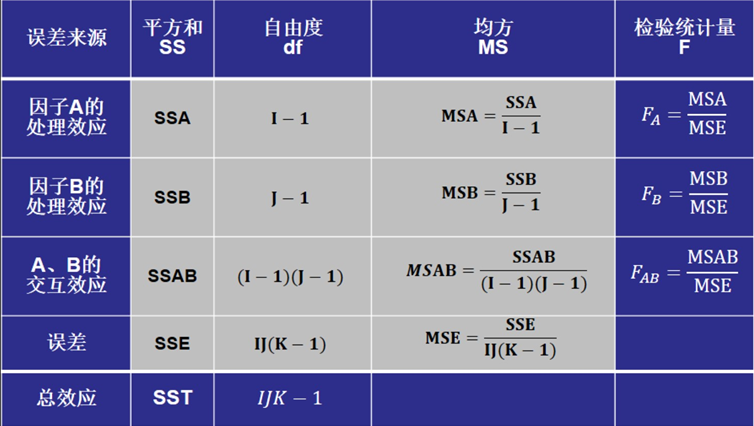

**【例7-6】**<p>
沿用7-5的数据，检验销售渠道、广告投放方式及其交互效应对销量的影响是否显著($\alpha=0.05$)<p>
**第一步:写出假设**<br>
设销售渠道(因子A)对销量的附加效应分别为$\alpha_1$(渠道1)、$\alpha_2$(渠道2)和$\alpha_3$(渠道3);广告投放方式(因子B)对销量的附加效应分别为$\beta_1$(广告投放方式甲)和$\beta_2$(广告投放方式乙)；交互效应为$\gamma_{ij}$<p>
检验销售渠道效应的假设为：<br>
$H_0:\alpha_1=\alpha_2=\alpha_3=0$(销售渠道对销量的影响不显著)<br>
$H_1:\alpha_1,\alpha_2,\alpha_3$至少有一个不等于0(销售渠道对销量的影响显著)<p>
检验广告投放方式效应的假设为：<br>
$H_0:\beta_1=\beta_2=0$(广告投放方式对销量的影响不显著)<br>
$H_1:\beta_1,\beta_2$至少有一个不等于0(广告投放方式对销量的影响显著)<p>
检验交互效应的假设为：<br>
$H_0:\gamma_{ij}=0$(交互效应不显著)<br>
$H_1:\gamma_{ij}$至少有一个不等于0(交互效应显著)<p>


**第二步:**调用anova_lm()获取主效应方差分析表<br>

In [5]:
import pandas as pd
from pandas import set_option
import numpy as np
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

#数据读入
df = pd.read_excel("data.xlsx",sheet_name = "7-5",index_col=0)

model2 = ols('销量~C(销售渠道)+C(广告投放)+C(销售渠道)*C(广告投放)',data=df).fit()
anovat = anova_lm(model2)
print(anovat)

                   df  sum_sq  mean_sq          F        PR(>F)
C(销售渠道)           2.0   560.0   280.00  54.368932  1.220666e-09
C(广告投放)           1.0   480.0   480.00  93.203883  9.729467e-10
C(销售渠道):C(广告投放)   2.0    10.4     5.20   1.009709  3.792836e-01
Residual         24.0   123.6     5.15        NaN           NaN


**第三步：**根据方差分析表推断各因子对因变量的影响。<br>
从方差分析结果可以看出，检验品种和施肥方式两个因子的P值均接近于0，表示两个因子对产量均有明显的影响。，但
交互效应项的P值=0.379>0.05，表示交互效应对产量的影响不显著。

**第四步：**同理，可以查看各因素的参数估计结果来判断其附加效应。<br>

In [6]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     销量   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     40.79
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           5.77e-11
Time:                        20:49:32   Log-Likelihood:                -63.806
No. Observations:                  30   AIC:                             139.6
Df Residuals:                      24   BIC:                             148.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      87.8000      1.015     86.512      0.000      85.705      89.895
C(销售渠道)[T.渠道2]                -10.4000      1.435     -7.246      0.000     -13.362      -7.438
C(销售渠道)[T.渠道3]                 -1.0000      1.435     -0.697      0.493      -3.962       1.962
C(广告投放)[T.甲]                   -7.6000      1.435     -5.295      0.000     -10.562      -4.638
C(销售渠道)[T.渠道2]:C(广告投放)[T.甲]     0.8000      2.030      0.394      0.697      -3.389       4.989
C(销售渠道)[T.渠道3]:C(广告投放)[T.甲]    -2.0000      2.030     -0.985      0.334      -6.189       2.189
==============================================================================
Omnibus:                        1.127   Durbin-Watson:                   2.334
Prob(Omnibus):                  0.569   Jarque-Bera (JB):                0.644
Skew:                          -0.359   Prob(JB):                        0.725
Kurtosis:                       3.007   Cond. No.                         9.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

同时，也可以绘制主效应和交互效应图来判断是否存在交互效应。<p>
**【不会用python画】**

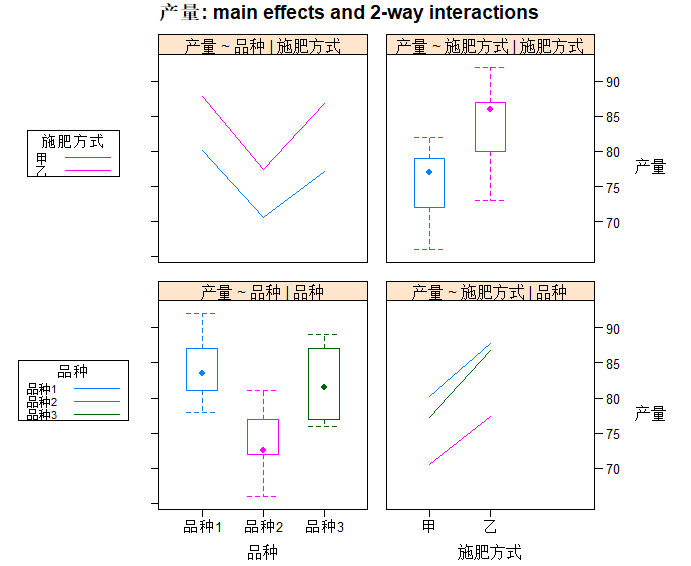

可见，图中的各条折线基本上是平行的，表示两个因子间无明显交互效应(无交互效应时，一个因子各处理间均值的差异
不会随着另一个因子处理的变化而变化，各条折线平行)；如果交叉，则意味着两个因子的各处理之间存在交互效应。

**（2）效应量分析**<p>
衡量两个因子效应量的统计量仍然偏效应(partial effect)，即偏$\eta^2$。 两个因子的效应量分别参考考虑交互效应的双因子方差分析模型和总误差分解模型。<p>
交互效应的偏效应量分别为:
$$partial \ \eta^2 \ of \ AB= \frac{SSAB}{SSAB+SSE}$$

因此，可以计算例7-6的偏效应量，如下：<p>
销售渠道的偏效应量：
$$partial \ \eta^2 of \ A = \frac{560}{560+123.6} = 0.8192 $$
广告投放方式的偏效应量：
$$partial \ \eta^2 of \ B = \frac{480}{480+123.6} = 0.7952 $$
交互效应的偏效应量：
$$partial \ \eta^2 of \ AB= \frac{10.4}{10.4+123.6} = 0.0776 $$

同理：可计算因子和交互效应的效应量。

**（3）模型比较**<p>
那么怎样比较主效应分析模型和交互效应分析模型是否有显著差异呢？可以用python中的anova_lm()函数比较两个模型。
【似然比检验】

In [8]:
anova_result = anova_lm(model1,model2)
print(anova_result)

   df_resid    ssr  df_diff  ss_diff         F    Pr(>F)
0      26.0  134.0      0.0      NaN       NaN       NaN
1      24.0  123.6      2.0     10.4  1.009709  0.379284


【代码说明】
statsmodels.stats.anova.anova_lm(\*args, **kwargs)[source]

**作用：**<br>
参数为多个模型时，比较模型间是否有显著差异

**输入参数：**<br>
具体解释见前文7.2.2基本步骤

**返回：**<br>
参数为多个模型时，返回DataFrame列如下：df_resid:模型残差的自由度，float64；ssr:模型残差平方和，float64;df_diff:与参数中前一个模型的自由度之差，float64;ss_dff:与参数中前一个模型的平方和之差，float64;F:与参数中前一个模型的比较的F统计量，float64;PR(>F):与参数中前一个模型相比显著性的P值，float64;